In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.geometry import Point

# busan_anch_train_final 배의 위치 plot

In [2]:
busan_anch_train = pd.read_csv("../기상청공모전/data/busan_anch_train_final.csv",encoding='utf-8')
busan_anch_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67747 entries, 0 to 67746
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        67747 non-null  int64  
 1   busan_anch_train_final.num        67747 non-null  int64  
 2   busan_anch_train_final.time       67747 non-null  object 
 3   busan_anch_train_final.latitude   67747 non-null  object 
 4   busan_anch_train_final.longitude  67747 non-null  object 
 5   busan_anch_train_final.sog        67747 non-null  float64
 6   busan_anch_train_final.cog        67747 non-null  float64
 7   busan_anch_train_final.hdg        67731 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 4.1+ MB


In [3]:
busan_anch_train.head()

,Unnamed: 0,busan_anch_train_final.num,busan_anch_train_final.time,busan_anch_train_final.latitude,busan_anch_train_final.longitude,busan_anch_train_final.sog,busan_anch_train_final.cog,busan_anch_train_final.hdg
0,1,1,2021-01-08 0:39,N35.063823,E129.05302,0.1,-99.9,344.0
1,2,1,2021-01-08 0:39,N35.063828,E129.05303,0.2,-99.9,342.0
2,3,1,2021-01-08 0:39,N35.063833,E129.05303,0.2,-99.9,339.0
3,4,1,2021-01-08 0:39,N35.063847,E129.05303,0.1,-99.9,337.0
4,5,1,2021-01-08 0:39,N35.063862,E129.05303,0.2,-99.9,336.0


In [4]:
# 오타가 있는 데이터 위치 반환
np.where(busan_anch_train['busan_anch_train_final.latitude']=='N35.064-99')

(array([75], dtype=int64),)

In [5]:
# 오타가 있는 데이터 위치 반환
np.where(busan_anch_train['busan_anch_train_final.longitude']=='E129.053-9')

(array([82, 83, 88], dtype=int64),)

In [6]:
busan_anch_train = busan_anch_train[['busan_anch_train_final.num', 'busan_anch_train_final.latitude','busan_anch_train_final.longitude']]

# mask 씌울 항목 선정 - latitude = 'N35.064-99' 인 항목은 float으로 바꿀 수 없으므로 제외함
mask1 =busan_anch_train['busan_anch_train_final.latitude'].isin(['N35.064-99'])
busan_anch_train = busan_anch_train[~mask1] # ~를 포함하게 되면 mask의 값을 제외, ~을 제외하면 mask의 값을 포함

# mask 씌울 항목 선정 - longitude = 'E129.053-9' 인 항목은 float으로 바꿀 수 없으므로 제외함
mask2 =busan_anch_train['busan_anch_train_final.longitude'].isin(['E129.053-9'])
busan_anch_train = busan_anch_train[~mask2] # ~를 포함하게 되면 mask의 값을 제외, ~을 제외하면 mask의 값을 포함

busan_anch_train = busan_anch_train.replace(regex=r'[N]', value='') # latitude 데이터의 'N'삭제
busan_anch_train = busan_anch_train.replace(regex=r'[E]', value='') # longititude 데이터의 'E'삭제


busan_anch_train = busan_anch_train.astype(float) # 모든 데이터 타입을 float으로 변경
busan_anch_train['busan_anch_train_final.num'] = busan_anch_train['busan_anch_train_final.num'].astype(int) # num 데이터 타입을 int으로 변경
busan_anch_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67743 entries, 0 to 67746
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   busan_anch_train_final.num        67743 non-null  int32  
 1   busan_anch_train_final.latitude   67743 non-null  float64
 2   busan_anch_train_final.longitude  67743 non-null  float64
dtypes: float64(2), int32(1)
memory usage: 1.8 MB


In [7]:
print(busan_anch_train['busan_anch_train_final.num'].unique())
len(busan_anch_train['busan_anch_train_final.num'].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 159 160]


141

In [8]:
busan_anch_train.head()

,busan_anch_train_final.num,busan_anch_train_final.latitude,busan_anch_train_final.longitude
0,1,35.063823,129.05302
1,1,35.063828,129.05303
2,1,35.063833,129.05303
3,1,35.063847,129.05303
4,1,35.063862,129.05303


In [9]:
def to_dec(coordinate):
    temp = coordinate.split()
    temp = [float(i) for i in temp[1].split("-")]
    
    deg = temp[0]
    min = temp[1]
    sec = temp[2]
    
    temp1 = deg + min/60 + sec/3600
    return round(temp1,6)

In [10]:
def isin_N2(latitude : float, longitude : float):
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-04-35.2"), to_dec("E 129-01-35.5")),
        (to_dec("N 35-04-35.2"), to_dec("E 129-01-53.4")),
        (to_dec("N 35-03-10.8"), to_dec("E 129-01-52.4")),
        (to_dec("N 35-03-10.6"), to_dec("E 129-01-02.2")),
        (to_dec("N 35-03-41.3"), to_dec("E 129-01-29.7")),
        (to_dec("N 35-04-26.9"), to_dec("E 129-01-29.7")),
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)
    target_point = Point(latitude,longitude)
    # 특정 점이 영역 내부에 있는지 확인
    is_inside = polygon.contains(target_point)

    # 결과 출력
    return is_inside

In [11]:
def isin_N3(latitude : float, longitude : float):
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-04-01.7"), to_dec("E 129-02-03.9")),
        (to_dec("N 35-04-01.7"), to_dec("E 129-03-11.1")),
        (to_dec("N 35-02-55.9"), to_dec("E 129-04-48.2")),
        (to_dec("N 35-02-39.5"), to_dec("E 129-02-13.5")),
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)
    target_point = Point(latitude,longitude)
    # 특정 점이 영역 내부에 있는지 확인
    is_inside = polygon.contains(target_point)

    # 결과 출력
    return is_inside

In [12]:
def isin_N4(latitude : float, longitude : float):
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-02-39.5"), to_dec("E 129-02-13.5")),
        (to_dec("N 35-02-55.9"), to_dec("E 129-04-48.2")),
        (to_dec("N 35-02-09.6"), to_dec("E 129-05-23.7")),
        (to_dec("N 35-01-36.7"), to_dec("E 129-02-38.1")),
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)
    target_point = Point(latitude,longitude)
    # 특정 점이 영역 내부에 있는지 확인
    is_inside = polygon.contains(target_point)

    # 결과 출력
    return is_inside

In [13]:
def isin_N5(latitude : float, longitude : float):
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-01-36.7"), to_dec("E 129-02-38.1")),
        (to_dec("N 35-02-09.6"), to_dec("E 129-05-23.7")),
        (to_dec("N 35-00-11.3"), to_dec("E 129-04-48.1")),
        (to_dec("N 35-00-11.5"), to_dec("E 129-02-38.1")),
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)
    target_point = Point(latitude,longitude)
    # 특정 점이 영역 내부에 있는지 확인
    is_inside = polygon.contains(target_point)

    # 결과 출력
    return is_inside

In [14]:
for i in busan_anch_train['busan_anch_train_final.num'].unique():
    temp = busan_anch_train[busan_anch_train['busan_anch_train_final.num'] == i]

    anchorage = []
    
    for j in range(len(temp)):
        lat = temp.iloc[j,1]
        long = temp.iloc[j,2]
        if isin_N2(lat,long):
            anchorage.append('N-2')
        elif isin_N3(lat,long):
            anchorage.append('N-3')
        elif isin_N4(lat,long):
            anchorage.append('N-4')
        elif isin_N5(lat,long):
            anchorage.append('N-5')
        else:
            anchorage.append('not decided')
    print(f'ship num : {i}, anchorage : {set(anchorage)}')
        

ship num : 1, anchorage : {'N-3'}
ship num : 2, anchorage : {'N-5'}
ship num : 3, anchorage : {'N-4'}
ship num : 4, anchorage : {'N-4'}
ship num : 5, anchorage : {'N-3'}
ship num : 6, anchorage : {'N-3'}
ship num : 7, anchorage : {'N-5'}
ship num : 8, anchorage : {'N-5'}
ship num : 9, anchorage : {'N-3'}
ship num : 10, anchorage : {'N-3'}
ship num : 11, anchorage : {'N-5'}
ship num : 12, anchorage : {'N-4'}
ship num : 13, anchorage : {'N-3'}
ship num : 14, anchorage : {'N-4'}
ship num : 15, anchorage : {'N-4'}
ship num : 16, anchorage : {'N-3'}
ship num : 17, anchorage : {'N-2'}
ship num : 18, anchorage : {'N-3'}
ship num : 19, anchorage : {'N-5'}
ship num : 20, anchorage : {'N-2'}
ship num : 21, anchorage : {'not decided'}
ship num : 22, anchorage : {'N-4'}
ship num : 23, anchorage : {'N-3'}
ship num : 24, anchorage : {'N-5'}
ship num : 25, anchorage : {'N-5'}
ship num : 26, anchorage : {'N-5'}
ship num : 27, anchorage : {'N-4'}
ship num : 28, anchorage : {'N-4', 'N-3'}
ship num : 29,

In [15]:
def area_N2():
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-04-35.2"), to_dec("E 129-01-35.5")),
        (to_dec("N 35-04-35.2"), to_dec("E 129-01-53.4")),
        (to_dec("N 35-03-10.8"), to_dec("E 129-01-52.4")),
        (to_dec("N 35-03-10.6"), to_dec("E 129-01-02.2")),
        (to_dec("N 35-03-41.3"), to_dec("E 129-01-29.7")),
        (to_dec("N 35-04-26.9"), to_dec("E 129-01-29.7")),
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)

    # 결과 출력
    return polygon

def area_N3():
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-04-01.7"), to_dec("E 129-02-03.9")),
        (to_dec("N 35-04-01.7"), to_dec("E 129-03-11.1")),
        (to_dec("N 35-02-55.9"), to_dec("E 129-04-48.2")),
        (to_dec("N 35-02-39.5"), to_dec("E 129-02-13.5")),
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)
    # 결과 출력
    return polygon

def area_N4():
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-02-39.5"), to_dec("E 129-02-13.5")),
        (to_dec("N 35-02-55.9"), to_dec("E 129-04-48.2")),
        (to_dec("N 35-02-09.6"), to_dec("E 129-05-23.7")),
        (to_dec("N 35-01-36.7"), to_dec("E 129-02-38.1")),
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)

    # 결과 출력
    return polygon

def area_N5():
    # 점의 좌표 리스트
    points = [
        (to_dec("N 35-01-36.7"), to_dec("E 129-02-38.1")),
        (to_dec("N 35-02-09.6"), to_dec("E 129-05-23.7")),
        (to_dec("N 35-00-11.3"), to_dec("E 129-04-48.1")),
        (to_dec("N 35-00-11.5"), to_dec("E 129-02-38.1")),
    ]

    # 점을 이어서 다각형 영역 생성
    polygon = Polygon(points)

    # 결과 출력
    return polygon


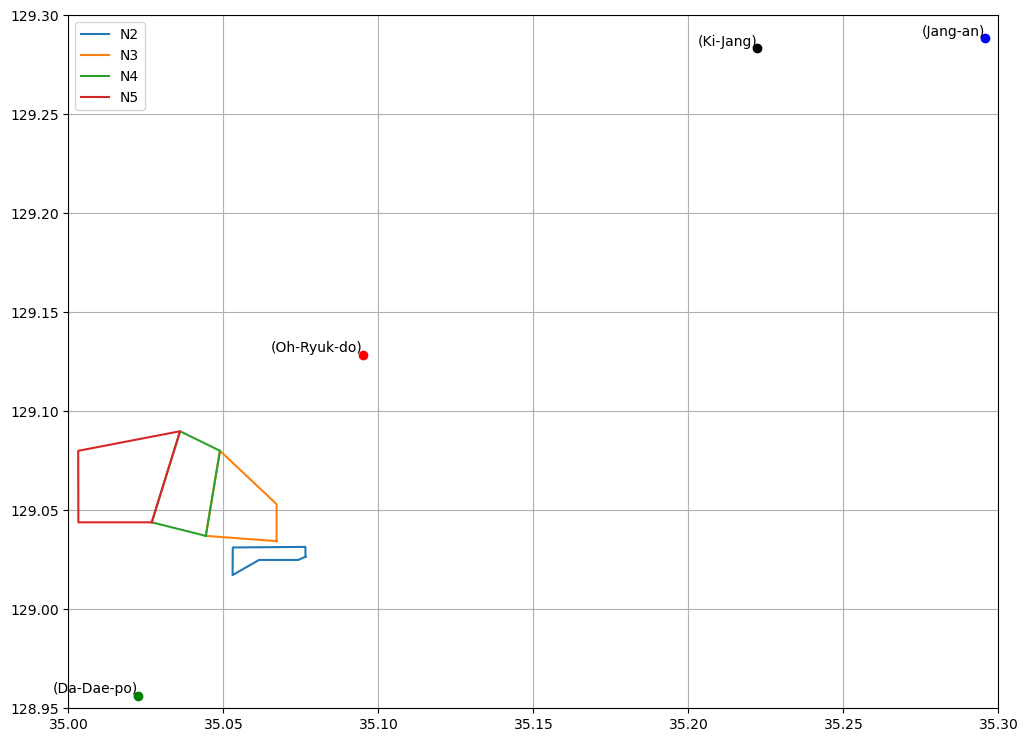

In [45]:
polygons = [area_N2(), area_N3(), area_N4(), area_N5()]

# plot 생성
fig, ax = plt.subplots(figsize=(12, 9))

# 각 다각형을 그리기
for polygon in polygons:
    x, y = polygon.exterior.xy
    ax.plot(x, y, label = f'N{polygons.index(polygon)+2}')

# 오륙도
ax.plot(35.095,129.1283,'ro')
ax.text(35.095, 129.1283, f'(Oh-Ryuk-do)', ha='right', va='bottom')

ax.plot(35.2958,129.2883,'bo')
ax.text(35.2958,129.2883, f'(Jang-an)', ha='right', va='bottom')

ax.plot(35.0224,128.9561,'go')
ax.text(35.0224,128.9561, f'(Da-Dae-po)', ha='right', va='bottom')

ax.plot(35.2222,129.2833,'ko')
ax.text(35.2222,129.2833, f'(Ki-Jang)', ha='right', va='bottom')

# 그리기 옵션 설정
ax.set_xlim([35, 35.3])  # x 축 범위 설정
ax.set_ylim([128.95, 129.3])  # y 축 범위 설정
ax.grid(True)  # 그리드 표시


plt.legend()
plt.savefig('ekc_park_0608_busan_anchorage.png')
# plot 보이기
plt.show()




오륙도 35.095   129.1283
장안   35.2958   129.2883
다대포 35.0224    128.9561
간절곶 35.367    129.375
기장   35.2222    129.2833
당사   35.5778    129.5028